In [1]:
%matplotlib notebook

In [2]:
import sys
sys.path.append("..")
import os
os.environ["OMP_NUM_THREADS"] = "4" # export OMP_NUM_THREADS=4
os.environ["OPENBLAS_NUM_THREADS"] = "4" # export OPENBLAS_NUM_THREADS=4 
os.environ["MKL_NUM_THREADS"] = "4" # export MKL_NUM_THREADS=4
os.environ["VECLIB_MAXIMUM_THREADS"] = "4" # export VECLIB_MAXIMUM_THREADS=4
os.environ["NUMEXPR_NUM_THREADS"] = "4" # export NUMEXPR_NUM_THREADS=4
import mkl
mkl.set_num_threads(4) #enforce

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import molmeshtool.spheremesh as sp





In [ ]:
rg=12
pts,bl,trigs,err=sp.genSphereMesh(1.0,rg)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pts[:,0],pts[:,1],pts[:,2],marker='o')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
for blt in bl:
    pbeg=blt[0]
    pend=blt[1]
    ax.plot([pts[pbeg,0],pts[pend,0]],[pts[pbeg,1],pts[pend,1]],[pts[pbeg,2],pts[pend,2]],color='k')
#fig.show()
print("Sphere of range ",rg, " has ",pts.shape[0]," points")

In [ ]:
print("Faces of ",trigs.shape[0]," Triangles index vertices for ",pts.shape[0],"points (2(N-2)) \n", trigs)
print("bond relative displacement ",err)

In [ ]:
from molmeshtool.genatomview import genAtomView
import vpython as vp
#radiusv=list(0.1 for i in range(pts.shape[0]))
#colors=list(vp.color.blue for i in range(pts.shape[0]))
#sh,bk=genAtomView(pts,np.array(radiusv),colors,bl)

In [ ]:
ncoor=np.array([[-1,0,0],[0,1,1],[1,0.5,0.5],[2,0,1],[4,4,4]])
rdlis=np.array([1.5,1.5,1.5,1.5,1.5])

In [3]:
import molmeshtool.proctools as mpt

In [ ]:
vsi=mpt.VesicleGenerator(ncoor,rdlis)

In [ ]:
pts2,bl2,trigs2,err2=vsi.generator3(2)

In [ ]:
radiusv2=list(0.1 for i in range(pts2.shape[0]))
colors2=list(vp.color.blue for i in range(pts2.shape[0]))
sh,bk=genAtomView(pts2,np.array(radiusv2),colors2,bl2)
sh2,bk2=genAtomView(ncoor,rdlis)

In [ ]:
print(err2)

In [ ]:
print(trigs2)

In [ ]:
fig2 = plt.figure()
bx = fig2.add_subplot(111, projection='3d')
bx.scatter(pts2[:,0],pts2[:,1],pts2[:,2],marker='o',s=500)
bx.set_xlabel("X")
bx.set_ylabel("Y")
bx.set_zlabel("Z")
for blt in bl2:
    pbeg=blt[0]
    pend=blt[1]
    bx.plot([pts2[pbeg,0],pts2[pend,0]],[pts2[pbeg,1],pts2[pend,1]],[pts2[pbeg,2],pts2[pend,2]],color='k')
fig2.show()

In [4]:
import molmeshtool.loadPDB as lpd

In [5]:
filename="/home/edisel/Documentos/Repositorio/ProyectosLocales/ECVM/Ligandos/Trombin/pdb6c2w.ent.pdb"
atypes,apos,aradi=lpd.loadPDB(filename)

In [6]:
vsi2=mpt.VesicleGenerator(apos,aradi)
pts3,bl3,trigs3,err3=vsi2.generator3(4)

<IPython.core.display.Javascript object>


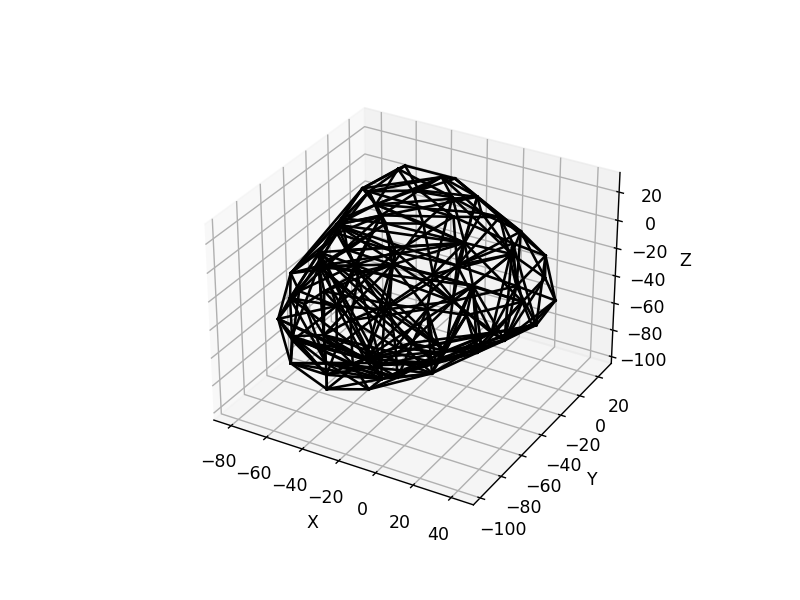

In [7]:
fig3 = plt.figure()
cx = fig3.add_subplot(111, projection='3d')
#cx.scatter(pts3[:,0],pts3[:,1],pts3[:,2],marker='o',s=100)
#cx.scatter(apos[:,0],apos[:,1],apos[:,2],marker="+")
cx.set_xlabel("X")
cx.set_ylabel("Y")
cx.set_zlabel("Z")
for blt in bl3:
    pbeg=blt[0]
    pend=blt[1]
    cx.plot([pts3[pbeg,0],pts3[pend,0]],[pts3[pbeg,1],pts3[pend,1]],[pts3[pbeg,2],pts3[pend,2]],color='k')
fig3.show()